# Problem 2 of HW 3
$\newcommand{\Ket}[1]{\left|#1\right>}$
$\newcommand{\Bra}[1]{\left<#1\right|}$

In [102]:
from qiskit import *
from math import *
import random

1.9476836947933962


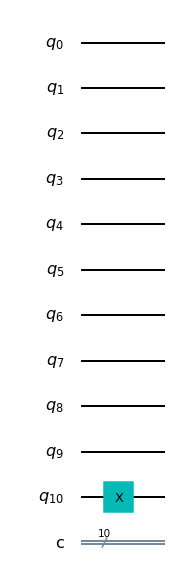

In [111]:
backend = BasicAer.get_backend('qasm_simulator')

n_comp = 10
qc = QuantumCircuit(n_comp + 1, n_comp)

# preparing phi state
# qc.x(3)
phi = random.random() * pi
print(phi)
qc.x(n_comp)
qc.draw('mpl')

Apply $H^{\otimes n_{comp}}$ to qubits 0 .. n_comp

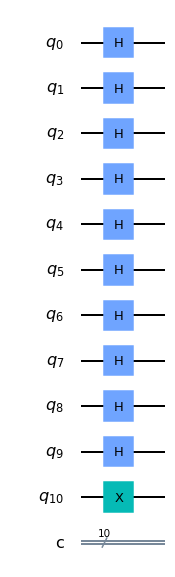

In [112]:
for j in range(n_comp):
    qc.h(j)
qc.draw('mpl')

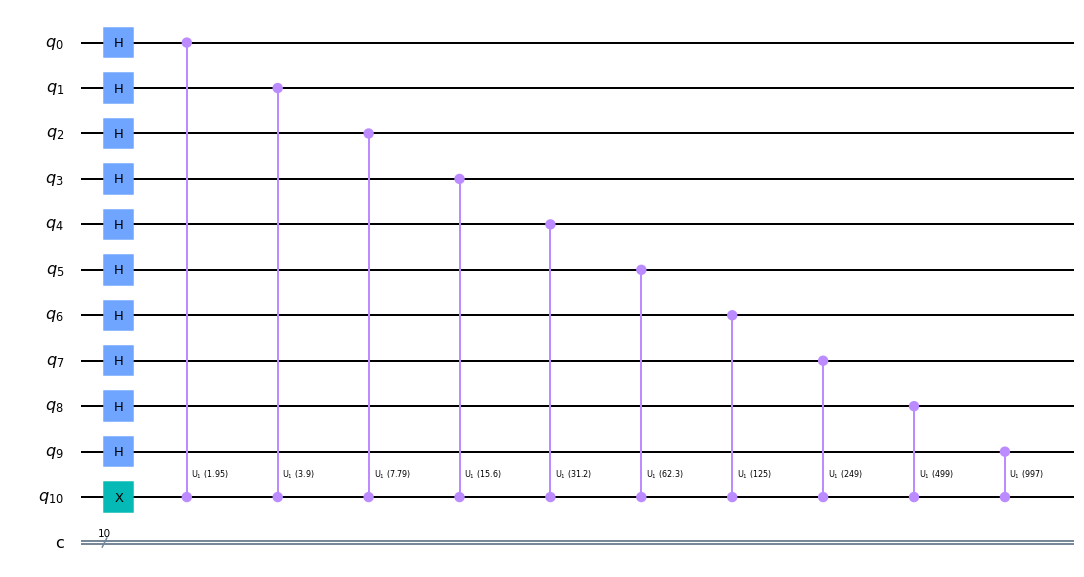

In [113]:
repetitions = 1
for j in range(n_comp):
#     angle is custom
    qc.cu1(repetitions * phi, j, n_comp); # This is C-U
    repetitions *= 2
qc.draw('mpl')

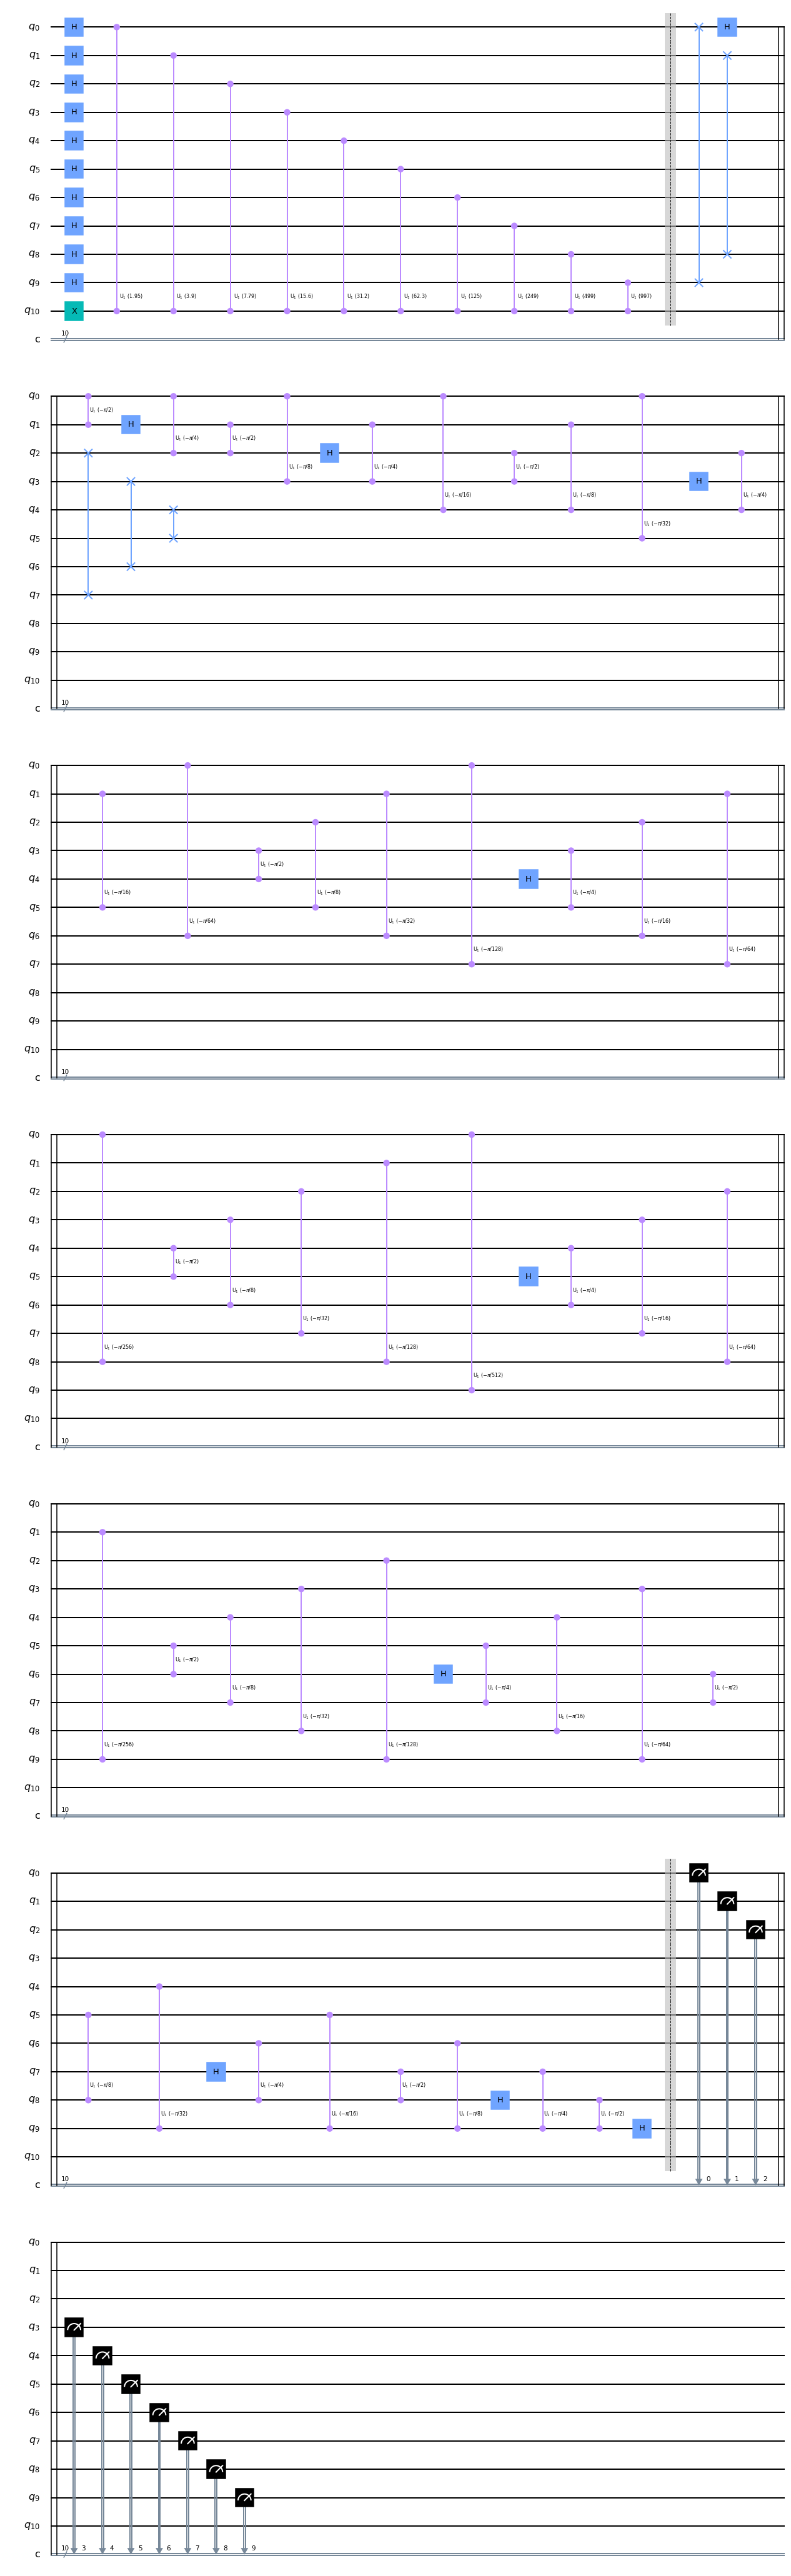

In [114]:
# qft dagger transformation
def qft_dag(qc, n_comp):
    for qubit in range(n_comp//2):
        qc.swap(qubit, n_comp-qubit-1)
    for j in range(n_comp):
        for m in range(j):
            qc.cu1(-pi/float(2**(j-m)), m, j)
        qc.h(j)
qc.barrier()
# Apply inverse QFT
qft_dag(qc, n_comp)
# Measure
qc.barrier()
for n in range(n_comp):
    qc.measure(n,n)
qc.draw('mpl')

In [115]:
shots = 2 ** 14
results = execute(qc, backend=backend, shots=shots).result()
res = results.get_counts()
print(res)

{'0100111101': 8696, '0100111111': 629, '0101000110': 17, '0100111011': 272, '0101000011': 47, '0100111110': 4711, '0100111100': 803, '0101100010': 4, '0101011100': 3, '0101000000': 223, '0101000010': 87, '0101001100': 12, '0100111001': 89, '0100111010': 131, '0100110001': 10, '0010101101': 1, '0100101011': 8, '0100110101': 19, '0100110100': 16, '0101010001': 3, '0101001111': 3, '0101000001': 125, '0100101101': 5, '0101001011': 9, '0101001000': 13, '0100111000': 52, '0101000101': 27, '0101000111': 18, '0100110110': 28, '1001001101': 1, '0100110010': 9, '0101010111': 4, '0101010110': 4, '0100100010': 5, '0100110111': 37, '0101101110': 1, '0101011111': 3, '0101000100': 37, '0101100000': 2, '0110110111': 1, '0110010010': 2, '0110000001': 1, '0011010001': 1, '0011110101': 1, '0100101111': 6, '0011001111': 2, '0100110000': 7, '0100101001': 4, '0100011001': 2, '0110100111': 1, '0101110100': 2, '0011000111': 1, '0100011101': 1, '1111100101': 1, '0101100101': 1, '0100011100': 2, '0111100011': 

In [116]:
# finding the most probable state
max = -1
relkey = -1
for key in res.keys():
    if res[key] > max:
        max = res[key]
        relkey = key
print(relkey)

0100111101


In [117]:
# transform into 10-digits form
mul = 1
sum = 0
for i in range(len(relkey) - 1, -1, -1):
    if relkey[i] == '1':
        sum += mul
    mul *= 2

In [118]:
print(2 * pi * sum / 2 ** n_comp, " is the result of computation")
print(phi, " is the phi we determined")
print( abs((2 * pi * sum / 2 ** n_comp - phi)) / phi, " is the relative error" )

1.945087639038993  is the result of computation
1.9476836947933962  is the phi we determined
0.001332893919758628  is the relative error
